In [ ]:
import sys
print(sys.executable)

C:\Users\ADMIN\anaconda3\envs\myenv\python.exe


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from underthesea import word_tokenize, pos_tag, sent_tokenize
import regex
import demoji
from pyvi import ViPosTagger, ViTokenizer
import string
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [ ]:
##LOAD EMOJICON
file = open('files/emojicon.txt', 'r', encoding="utf8")
emoji_lst = file.read().split('\n')
emoji_dict = {}
for line in emoji_lst:
    key, value = line.split('\t')
    emoji_dict[key] = str(value)
file.close()
#################
#LOAD TEENCODE
file = open('files/teencode.txt', 'r', encoding="utf8")
teen_lst = file.read().split('\n')
teen_dict = {}
for line in teen_lst:
    key, value = line.split('\t')
    teen_dict[key] = str(value)
file.close()
###############
#LOAD TRANSLATE ENGLISH -> VNMESE
file = open('files/english-vnmese.txt', 'r', encoding="utf8")
english_lst = file.read().split('\n')
english_dict = {}
for line in english_lst:
    key, value = line.split('\t')
    english_dict[key] = str(value)
file.close()
################
#LOAD wrong words
file = open('files/wrong-word.txt', 'r', encoding="utf8")
wrong_lst = file.read().split('\n')
file.close()
#################
#LOAD STOPWORDS
file = open('files/vietnamese-stopwords.txt', 'r', encoding="utf8")
stopwords_lst = file.read().split('\n')
file.close()

In [ ]:
def process_text(text, emoji_dict = emoji_dict, teen_dict = teen_dict, wrong_lst = wrong_lst):
    document = text.lower()
    document = document.replace("’",'')
    document = regex.sub(r'\.+', ".", document)
    new_sentence =''
    for sentence in sent_tokenize(document):
        # if not(sentence.isascii()):
        ###### CONVERT EMOJICON
        sentence = ''.join(emoji_dict[word] + ' ' if word in emoji_dict else word for word in list(sentence))
        ###### CONVERT TEENCODE
        sentence = ' '.join(teen_dict[word] if word in teen_dict else word for word in sentence.split())
        ###### DEL Punctuation & Numbers
        pattern = r'(?i)\b[a-záàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ]+\b'
        sentence = ' '.join(regex.findall(pattern,sentence))
        ###### DEL wrong words   
        sentence = ' '.join('' if word in wrong_lst else word for word in sentence.split())
        new_sentence = new_sentence + sentence + '. '                    
    document = new_sentence  
    #print(document)
    ###### DEL excess blank space
    document = regex.sub(r'\s+', ' ', document).strip()
    return document

In [ ]:
# Chuẩn hóa unicode tiếng việt
def loaddicchar():
    uniChars = "àáảãạâầấẩẫậăằắẳẵặèéẻẽẹêềếểễệđìíỉĩịòóỏõọôồốổỗộơờớởỡợùúủũụưừứửữựỳýỷỹỵÀÁẢÃẠÂẦẤẨẪẬĂẰẮẲẴẶÈÉẺẼẸÊỀẾỂỄỆĐÌÍỈĨỊÒÓỎÕỌÔỒỐỔỖỘƠỜỚỞỠỢÙÚỦŨỤƯỪỨỬỮỰỲÝỶỸỴÂĂĐÔƠƯ"
    unsignChars = "aaaaaaaaaaaaaaaaaeeeeeeeeeeediiiiiooooooooooooooooouuuuuuuuuuuyyyyyAAAAAAAAAAAAAAAAAEEEEEEEEEEEDIIIOOOOOOOOOOOOOOOOOOOUUUUUUUUUUUYYYYYAADOOU"

    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'.split(
        '|')
    charutf8 = "à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ".split(
        '|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic
 
# Đưa toàn bộ dữ liệu qua hàm này để chuẩn hóa lại
def covert_unicode(txt):
    dicchar = loaddicchar()
    return regex.sub(
        r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], txt)

In [ ]:
def insight_process_special_word(text, special_word):
    new_text = ''
    text_lst = text.split()
    i = 0
    if special_word in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
            #print(word)
            #print(i)
            if  word == special_word:
                next_idx = i+1
                if next_idx <= len(text_lst) -1:
                    word = word +'_'+ text_lst[next_idx]
                i= next_idx + 1
            else:
                i = i+1
            new_text = new_text + word + ' '
    else:
        new_text = text
    return new_text.strip()
    
# có thể bổ sung thêm các từ: chẳng, chả...
def process_special_word(text, special_words = ['không', 'chẳng', 'chả']):
    new_text = insight_process_special_word(text, special_words[0])
    for word in special_words[1:]:
        new_text = insight_process_special_word(new_text, word)
    return new_text.strip()

In [ ]:
def process_postag_thesea(text):
    new_document = ''
    for sentence in sent_tokenize(text):
        sentence = sentence.replace('.','')
        ###### POS tag
        lst_word_type = ['A','AB','V','VB','VY','R']
        sentence = ' '.join( word[0] if word[1].upper() in lst_word_type else '' for word in pos_tag(process_special_word(word_tokenize(sentence, format="text"))))
        new_document = new_document + sentence + ' '
    ###### DEL excess blank space
    new_document = regex.sub(r'\s+', ' ', new_document).strip()
    return new_document

In [ ]:
def remove_stopword(text, stopwords = stopwords_lst):
    ###### REMOVE stop words
    document = ' '.join('' if word in stopwords else word for word in text.split())
    #print(document)
    ###### DEL excess blank space
    document = regex.sub(r'\s+', ' ', document).strip()
    return document

In [ ]:
example = '''Đầu năm vk ck tôi đi ctác ở sg ít ngày. 
Chúng tôi ở ks XXX. Ks ổn 👍, 😊. 
Phục vụ tốt chăm sóc nhiệt tình. 
Buffet ngon nhiều món. Phòng sạch sẽ.đầy đủ tiện nghi, view đẹp hướng ra sông sg.  
Nhân viên thái độ phục vụ tốt 💙. Vị trí trung tâm tiện cho di chuyển thăm quan.'''

In [ ]:
data = pd.read_excel("review_full_text_tripadvisor_raw.xlsx", index_col = 0, engine='openpyxl',)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82380 entries, Hotel des Arts Saigon Mgallery to Khai Hoan Hotel
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_name  82380 non-null  object
 1   title          82378 non-null  object
 2   full_content   82380 non-null  object
 3   rating         82380 non-null  object
 4   rating_new     82380 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
data.head()

,customer_name,title,full_content,rating,rating_new
hotel_name,,,,,
Hotel des Arts Saigon Mgallery,Anh Tuấn L,Quá Tuyệt Vời Khi Ở Des Arts Sài Gòn,#HôtelDesArtsSaiGon là một sự trải nghiệm tuyệ...,bubble_50,5
Hotel des Arts Saigon Mgallery,TRƯƠNG BẰNG,Đáng đồng tiền!,"Dịch vụ cao cấp, phong cách chuyên nghiệp & tậ...",bubble_50,5
Hotel des Arts Saigon Mgallery,Phong Thu Vu,huyền bí và ấn tượng,vài dòng note lại về #Mgalery huyền bí... khác...,bubble_50,5
Hotel des Arts Saigon Mgallery,monkeyminhvn,love decor and service,Mình rất thích ngắm mái vòm và những khung cửa...,bubble_50,5
Hotel des Arts Saigon Mgallery,Ngoc Dung P,"Dễ thương, ấm cúng",Ks không lớn lắm nhưng có lối trang trí ấm cún...,bubble_40,4


In [ ]:
data = data.reset_index()
df = data[['title', 'full_content', 'rating_new']]
df.head()

,title,full_content,rating_new
0,Quá Tuyệt Vời Khi Ở Des Arts Sài Gòn,#HôtelDesArtsSaiGon là một sự trải nghiệm tuyệ...,5
1,Đáng đồng tiền!,"Dịch vụ cao cấp, phong cách chuyên nghiệp & tậ...",5
2,huyền bí và ấn tượng,vài dòng note lại về #Mgalery huyền bí... khác...,5
3,love decor and service,Mình rất thích ngắm mái vòm và những khung cửa...,5
4,"Dễ thương, ấm cúng",Ks không lớn lắm nhưng có lối trang trí ấm cún...,4


In [ ]:
df.isnull().sum()

title           2
full_content    0
rating_new      0
dtype: int64

In [ ]:
df['text'] = df['title'].str.strip() + '. ' + df['full_content'].str.strip()
df['text'] = df['text'].astype(str)
df = df[['text', 'rating_new']]
df.columns = ['text', 'rating']

In [ ]:
df.head()

,text,rating
0,Quá Tuyệt Vời Khi Ở Des Arts Sài Gòn. #HôtelDe...,5
1,"Đáng đồng tiền!. Dịch vụ cao cấp, phong cách c...",5
2,huyền bí và ấn tượng. vài dòng note lại về #Mg...,5
3,love decor and service. Mình rất thích ngắm má...,5
4,"Dễ thương, ấm cúng. Ks không lớn lắm nhưng có ...",4


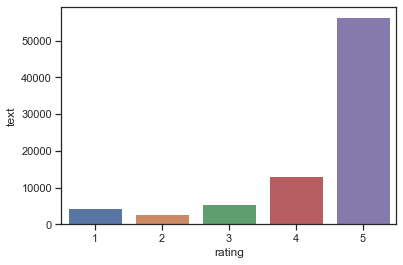

In [ ]:
sns.barplot(data=df.groupby(['rating']).count().reset_index(), x='rating', y='text')
plt.show()

In [ ]:
df['sentiment'] = df.apply(lambda x: "Positive" if x['rating'] > 3 else "Negative" ,axis = 1)
df['output'] = df.apply(lambda x: 1 if x['sentiment'] == "Positive" else 0, axis = 1)
df.head()

,text,rating,sentiment,output
0,Quá Tuyệt Vời Khi Ở Des Arts Sài Gòn. #HôtelDe...,5,Positive,1
1,"Đáng đồng tiền!. Dịch vụ cao cấp, phong cách c...",5,Positive,1
2,huyền bí và ấn tượng. vài dòng note lại về #Mg...,5,Positive,1
3,love decor and service. Mình rất thích ngắm má...,5,Positive,1
4,"Dễ thương, ấm cúng. Ks không lớn lắm nhưng có ...",4,Positive,1


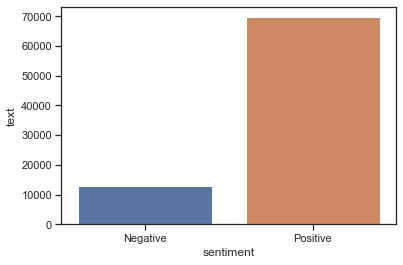

Positive    69659
Negative    12721
Name: sentiment, dtype: int64


In [ ]:
sns.barplot(data=df.groupby(['sentiment']).count().reset_index(), x='sentiment', y='text')
plt.show()
print(df.sentiment.value_counts())

In [ ]:
# ●Bước 1: Tiền xử lý dữ liệu thô
#  Chuyển text về chữ thường
#  Loại bỏ các ký tự đặc biệt nếu có
#  Thay thế emojicon bằng text tương ứng
#  Thay thế teencode bằng text tương tứng
#  Thay thế một số punctuation và number bằng khoảng trắng
#  Thay thế các từ sai chính tả bằng khoảng trắng hoặc từ đúng
#  Thay thế loạt khoảng trắng bằng một khoảng trắng

In [ ]:
import time
def handleText(row):
    text = row['text']
    new_text = remove_stopword(process_special_word(process_postag_thesea(covert_unicode(process_text(text)))))
    return new_text

In [ ]:
initTime = time.time()
df['processed_text'] = df.apply(handleText, axis = 1)
print(time.time() - initTime)

2359.7713663578033


In [ ]:
df.head()

,text,rating,sentiment,output,processed_text
0,Quá Tuyệt Vời Khi Ở Des Arts Sài Gòn. #HôtelDe...,5,Positive,1,tuyệt_vời trải_nghiệm tuyệt_vời ghé tươi thích...
1,"Đáng đồng tiền!. Dịch vụ cao cấp, phong cách c...",5,Positive,1,đồng_tiền chuyên_nghiệp hơi thích_hợp chống tr...
2,huyền bí và ấn tượng. vài dòng note lại về #Mg...,5,Positive,1,chú_ý lướt đắm chìm bình_yên thoải_mái thân_th...
3,love decor and service. Mình rất thích ngắm má...,5,Positive,1,thích ngắm tròn thư_thái lắm thượng bơi nối ng...
4,"Dễ thương, ấm cúng. Ks không lớn lắm nhưng có ...",4,Positive,1,không_lớn lắm trí thân_thiện đẹp ngắm giá_cả n...


In [ ]:
df.to_csv("process_data.csv")

In [ ]:
new_df = pd.read_csv("process_data.csv", index_col=0)
new_df.head()

,text,rating,sentiment,output,processed_text
0,Quá Tuyệt Vời Khi Ở Des Arts Sài Gòn. #HôtelDe...,5,Positive,1,tuyệt_vời trải_nghiệm tuyệt_vời ghé tươi thích...
1,"Đáng đồng tiền!. Dịch vụ cao cấp, phong cách c...",5,Positive,1,đồng_tiền chuyên_nghiệp hơi thích_hợp chống tr...
2,huyền bí và ấn tượng. vài dòng note lại về #Mg...,5,Positive,1,chú_ý lướt đắm chìm bình_yên thoải_mái thân_th...
3,love decor and service. Mình rất thích ngắm má...,5,Positive,1,thích ngắm tròn thư_thái lắm thượng bơi nối ng...
4,"Dễ thương, ấm cúng. Ks không lớn lắm nhưng có ...",4,Positive,1,không_lớn lắm trí thân_thiện đẹp ngắm giá_cả n...


In [ ]:
from tqdm import tqdm
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Bidirectional, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
X = new_df['processed_text'].astype(str)
y = new_df['output']
max_features = 500

In [ ]:
token = Tokenizer(num_words = max_features, filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
token.fit_on_texts(X)
sequences = token.texts_to_sequences(X)
sequences_matrix_X = sequence.pad_sequences(sequences)

In [ ]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(token, handle, protocol=pickle.HIGHEST_PROTOCOL)

# # loading
# with open('tokenizer.pickle', 'rb') as handle:
#     tokenizer = pickle.load(handle)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix_X, y, test_size= 0.1, stratify=y)

In [ ]:
# Define model RNN
model = Sequential()
model.add(Embedding(500, 128))
model.add(LSTM(128))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# compile
model.compile(loss ='binary_crossentropy', optimizer = RMSprop(), metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 128)         64000     
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dense_10 (Dense)            (None, 512)               66048     
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 batch_normalization_3 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                      

In [ ]:
def scheduler(epoch, lr):
    if epoch < 3:
        return 0.001
    if epoch < 5:
        return 0.0005
    if epoch < 10:
        return 0.0002
    if epoch < 15:
        return 0.0001
    return 0.00005

In [ ]:
history = model.fit(X_train, Y_train, batch_size = 128, epochs = 100, validation_split = 0.15, callbacks = [EarlyStopping(monitor = 'val_loss', patience = 5), LearningRateScheduler(scheduler)])

Epoch 1/100
493/493 [==============================] - 15s 27ms/step - loss: 0.2631 - accuracy: 0.9007 - val_loss: 0.2073 - val_accuracy: 0.9185 - lr: 0.0010
Epoch 2/100
493/493 [==============================] - 13s 26ms/step - loss: 0.1964 - accuracy: 0.9255 - val_loss: 0.2513 - val_accuracy: 0.9252 - lr: 0.0010
Epoch 3/100
493/493 [==============================] - 13s 26ms/step - loss: 0.1888 - accuracy: 0.9268 - val_loss: 0.1909 - val_accuracy: 0.9266 - lr: 0.0010
Epoch 4/100
493/493 [==============================] - 13s 26ms/step - loss: 0.1786 - accuracy: 0.9312 - val_loss: 0.1974 - val_accuracy: 0.9242 - lr: 5.0000e-04
Epoch 5/100
493/493 [==============================] - 13s 27ms/step - loss: 0.1750 - accuracy: 0.9328 - val_loss: 0.1929 - val_accuracy: 0.9280 - lr: 5.0000e-04
Epoch 6/100
493/493 [==============================] - 13s 26ms/step - loss: 0.1703 - accuracy: 0.9344 - val_loss: 0.1879 - val_accuracy: 0.9282 - lr: 2.0000e-04
Epoch 7/100
493/493 [===================

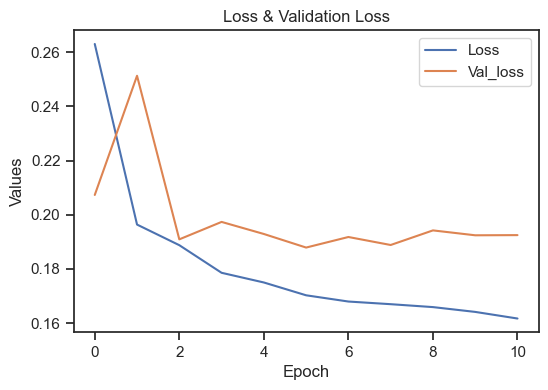

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss & Validation Loss')
plt.ylabel('Values')
plt.xlabel('Epoch')
plt.legend(['Loss', 'Val_loss'])
plt.show()

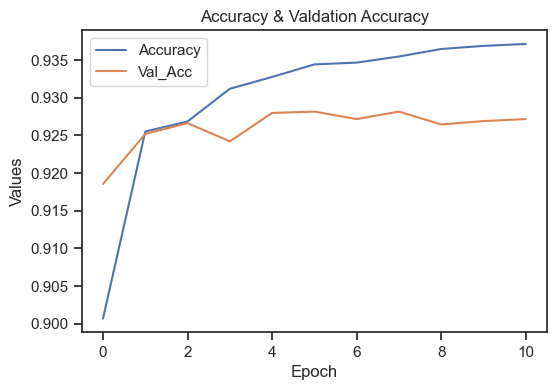

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy & Valdation Accuracy')
plt.ylabel('Values')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Val_Acc'])
plt.show()

In [ ]:
##test accuracy 
accr = model.evaluate(X_test, Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0], accr[1]))

258/258 [==============================] - 3s 10ms/step - loss: 0.2015 - accuracy: 0.9250
Test set
  Loss: 0.201
  Accuracy: 0.925


In [ ]:
result_test = model.predict(X_test)
result_test

array([[0.9844563 ],
       [0.9898865 ],
       [0.36686382],
       ...,
       [0.9990996 ],
       [0.99579763],
       [0.9938187 ]], dtype=float32)

In [ ]:
result_test = result_test > 0.5
result_test

array([[ True],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

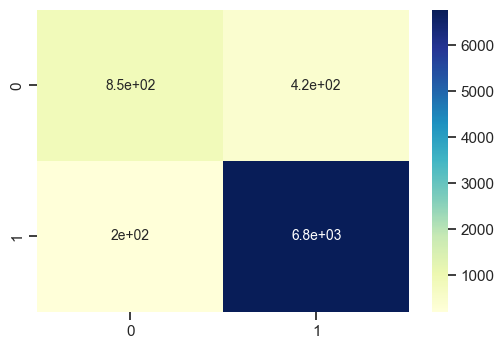

In [ ]:
matrix = confusion_matrix(y_true = Y_test, y_pred = result_test, labels = [0, 1] )
sns.heatmap(matrix, annot=True, annot_kws={"size": 10}, cmap="YlGnBu")
plt.show()

In [ ]:
print(classification_report(y_true = Y_test, y_pred = result_test, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78      1908
           1       0.95      0.97      0.96     10449

    accuracy                           0.94     12357
   macro avg       0.89      0.85      0.87     12357
weighted avg       0.93      0.94      0.93     12357

